In [2]:
import matplotlib.pyplot as plt 
import numpy as np 

# Definition of the k_armed bandit with eps sampling strategy

In [3]:
def k_armed_bandit(k, num_of_iter, eps, means, std_dev, eps_decay=None):
    all_values = np.zeros((k, num_of_iter))
    no_of_samples = np.zeros(k)
    total_reward = np.zeros(num_of_iter)
    total_regret = np.zeros(num_of_iter)
    # Initialisierung der Werte (an jedem Banditen wird einmal gezogen)
    for i in range(k):
        all_values[i][0] = np.random.normal(loc=means[i], scale=std_dev[i])
        no_of_samples[i] += 1

    total_reward[0] = np.sum(all_values[0, :], axis=0)
    total_regret[0] = k * np.max(means) - total_reward[0]

    # in diesem Fall bleibt epsilon konstant
    if eps_decay is None: 
        eps_decay = lambda i, num_of_iterations, eps: eps


    # Iteration
    for i in range(1, num_of_iter):
        eps_yes_no = np.random.uniform(0,1)

        # checken ob der epsilon Fall eintritt
        if eps_yes_no <= eps_decay(i, num_of_iter, eps): 
            current_bandit = int(np.floor(np.random.uniform(0,1) * k))
            no_of_samples[current_bandit] += 1
            all_values[current_bandit, i] = np.random.normal(loc=means[current_bandit], scale=std_dev[current_bandit])

        else: 
            # hier wird der mit dem maximalen bisherigen Mittelwert genommen
            current_bandit = np.argmax(np.sum(all_values[:, :i], axis=1) / no_of_samples)
            no_of_samples[current_bandit] += 1
            all_values[current_bandit, i] = np.random.normal(loc=means[current_bandit], scale=std_dev[current_bandit])
        
        total_reward[i] = total_reward[i-1] + all_values[current_bandit, i]
        total_regret[i] = total_regret[i-1] + (np.max(means) - all_values[current_bandit, i])
    

    return all_values, total_reward, total_regret, no_of_samples

Some plotting and averaging function 

In [32]:
def averageraging_plotting(k,num_of_iter,eps,num_of_avg, means, std_dev, init= None, decay= None, stationary = None):
    all_values = np.zeros((k, num_of_iter))
    total_reward = np.zeros(num_of_iter)
    total_regret = np.zeros(num_of_iter)
    total_number_of_samples = np.zeros(k)

    for i in range(num_of_avg):
        print(i)
        if init == None:
            all_values_i, total_reward_i, total_regret_i, number_of_samples_i = k_armed_bandit(k, num_of_iter,eps,means,std_dev)
        elif init == 1:
            all_values_i, total_reward_i, total_regret_i, number_of_samples_i = k_armed_bandit_init1(k, num_of_iter,eps,means,std_dev)
        elif init == 2:
            all_values_i, total_reward_i, total_regret_i, number_of_samples_i = k_armed_bandit_init2(k, num_of_iter,eps,means,std_dev)
        if decay == None:
            all_values_i, total_reward_i, total_regret_i, number_of_samples_i = k_armed_bandit(k, num_of_iter,eps,means,std_dev)
        else:
            all_values_i, total_reward_i, total_regret_i, number_of_samples_i = k_armed_bandit(k, num_of_iter,eps,means,std_dev,eps_decay= decay)


        all_values += all_values_i
        total_reward += total_reward_i
        total_regret += total_regret_i
        total_number_of_samples += number_of_samples_i

    all_values = all_values/num_of_avg
    total_reward = total_reward/num_of_avg
    total_regret = total_regret/num_of_avg
    total_number_of_samples = total_number_of_samples/num_of_avg
    best_percantage = total_number_of_samples[0]/num_of_iter
    print("The best bandit was selected", best_percantage*100,"% of the time.")
    plt.plot(np.linspace(0, num_of_iter-1, num_of_iter), total_reward, label='gesammelte Belohnung')
    plt.plot(np.linspace(0, num_of_iter-1, num_of_iter), means[0]*np.linspace(1, num_of_iter, num_of_iter) + (k-1)*max(means), label='maximaler reward')
    plt.plot(np.linspace(0, num_of_iter-1, num_of_iter), total_regret, label='verlust')

    plt.legend()
    plt.show()
    return total_reward[-1], total_regret[-1], best_percantage
    

Some initial parameters that we tried 

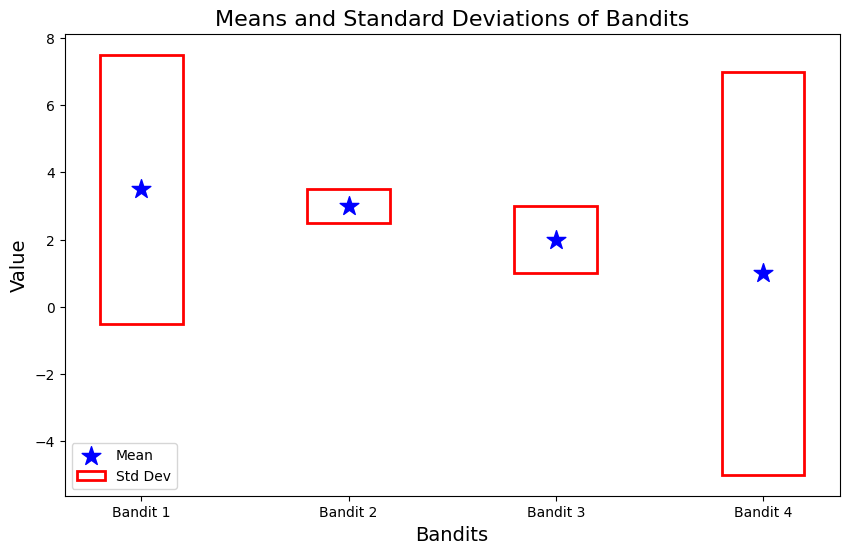

In [10]:
means = np.array([3.5, 3, 2, 1])
std_dev = np.array([4, 0.5, 1, 6])
bandits = ['Bandit 1', 'Bandit 2', 'Bandit 3', 'Bandit 4']

# Scatter Plot mit Sternen für die Mittelwerte und Boxen für die Standardabweichungen

fig, ax = plt.subplots(figsize=(10, 6))

# Mittelwerte als Sterne plotten
ax.scatter(bandits, means, color='blue', marker='*', s=200, label='Mean')

# Boxen für die Standardabweichungen
for i in range(len(bandits)):
    ax.add_patch(plt.Rectangle((i - 0.2, means[i] - std_dev[i]), 0.4, 2 * std_dev[i], 
                               edgecolor='red', facecolor='none', lw=2, label='Std Dev' if i == 0 else ""))

# Titel und Achsenbeschriftungen
ax.set_title('Means and Standard Deviations of Bandits', fontsize=16)
ax.set_xlabel('Bandits', fontsize=14)
ax.set_ylabel('Value', fontsize=14)
ax.legend()

plt.show()


Running the multi-armed Bandit num_of_avg times to determine trustfull results

In [77]:
k = 4 
num_of_iter = 10000
eps = 0.1

num_of_avg = 1000

The best bandit was selected 81.63597 % of the time.


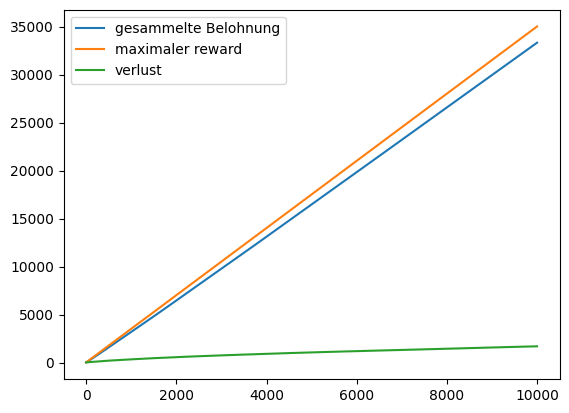

In [78]:
reward_e01, regret_e01, best_perc_e01 = averageraging_plotting(k,num_of_iter,eps,num_of_avg,means,std_dev)

# Variation von $\epsilon$

In [93]:
k = 4 
num_of_iter = 10000
eps = 0.01
num_of_avg = 1000

The best bandit was selected 49.6901 % of the time.
[4969.01 4976.24   25.9    31.85]


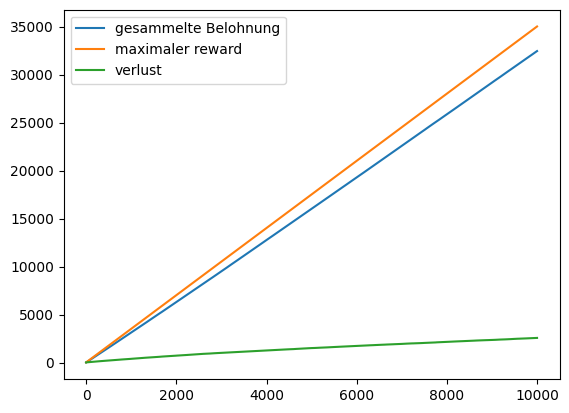

In [94]:
reward_e001, regret_e001, best_perc_e001 = averageraging_plotting(k,num_of_iter,eps,num_of_avg,means,std_dev)

$\epsilon$ = 0.2

In [81]:
k = 4 
num_of_iter = 10000
eps = 0.2
num_of_avg = 1000

The best bandit was selected 79.97462 % of the time.


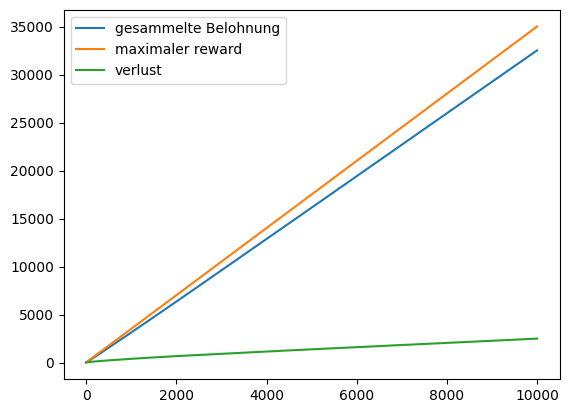

In [82]:
reward_e02, regret_e02, best_perc_e02 = averageraging_plotting(k,num_of_iter,eps,num_of_avg,means,std_dev)

In [91]:
print(total_number_of_samples)

[8057.89  938.25  499.2   507.66]


In [85]:
print(reward_e01)
print(reward_e02)
print(reward_e001)

33320.97942944086
32519.81535610593
32695.160530239013


# Initialisierung der Schätzwerte

In [5]:
def k_armed_bandit_init1(k, num_of_iter, eps, means, std_dev, eps_decay=None):
    all_values = np.zeros((k, num_of_iter))
    no_of_samples = np.zeros(k)
    total_reward = np.zeros(num_of_iter)
    total_regret = np.zeros(num_of_iter)

    

    total_reward[0] = np.sum(all_values[0, :], axis=0)
    total_regret[0] = k * np.max(means) - total_reward[0]

    if eps_decay is None: 
        eps_decay = lambda i, num_of_iterations, eps: eps

    for i in range(0, num_of_iter):
        eps_yes_no = np.random.uniform(0,1)
        if eps_yes_no <= eps_decay(i, num_of_iter, eps): 
            current_bandit = int(np.floor(np.random.uniform(0,1) * k))
            no_of_samples[current_bandit] += 1
            all_values[current_bandit, i] = np.random.normal(loc=means[current_bandit], scale=std_dev[current_bandit])

        else: 
            current_bandit = np.argmax(np.sum(all_values[:, :i], axis=1) / no_of_samples)
            no_of_samples[current_bandit] += 1
            all_values[current_bandit, i] = np.random.normal(loc=means[current_bandit], scale=std_dev[current_bandit])
        
        total_reward[i] = total_reward[i-1] + all_values[current_bandit, i]
        total_regret[i] = total_regret[i-1] + (np.max(means) - all_values[current_bandit, i])
    

    return all_values, total_reward, total_regret, no_of_samples

In [13]:
k = 4 
num_of_iter = 10000
eps = 0.1
num_of_avg = 100

0


C:\Users\Adam-\AppData\Local\Temp\ipykernel_22448\3814964154.py:23: RuntimeWarning: invalid value encountered in divide
  current_bandit = np.argmax(np.sum(all_values[:, :i], axis=1) / no_of_samples)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
The best bandit was selected 82.7003 % of the time.


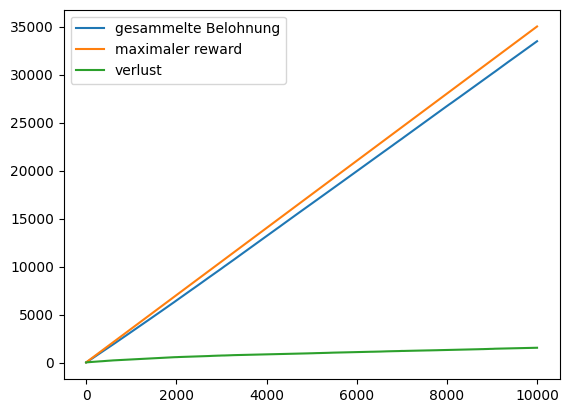

In [14]:
reward_init1, regret_init1, best_perc_init1 = averageraging_plotting(k,num_of_iter,eps,num_of_avg,means,std_dev, init = 1)

In [8]:
def k_armed_bandit_init2(k, num_of_iter, eps, means, std_dev, eps_decay=None):
    all_values = np.zeros((k, num_of_iter))
    no_of_samples = np.zeros(k)
    total_reward = np.zeros(num_of_iter)
    total_regret = np.zeros(num_of_iter)

    for i in range(k):
        all_values[i][0] = 10
        no_of_samples[i] += 1

    total_reward[0] = np.sum(all_values[0, :], axis=0)
    total_regret[0] = k * np.max(means) - total_reward[0]

    if eps_decay is None: 
        eps_decay = lambda i, num_of_iterations, eps: eps

    for i in range(1, num_of_iter):
        eps_yes_no = np.random.uniform(0,1)
        if eps_yes_no <= eps_decay(i, num_of_iter, eps): 
            current_bandit = int(np.floor(np.random.uniform(0,1) * k))
            no_of_samples[current_bandit] += 1
            all_values[current_bandit, i] = np.random.normal(loc=means[current_bandit], scale=std_dev[current_bandit])

        else: 
            current_bandit = np.argmax(np.sum(all_values[:, :i], axis=1) / no_of_samples)
            no_of_samples[current_bandit] += 1
            all_values[current_bandit, i] = np.random.normal(loc=means[current_bandit], scale=std_dev[current_bandit])
        
        total_reward[i] = total_reward[i-1] + all_values[current_bandit, i]
        total_regret[i] = total_regret[i-1] + (np.max(means) - all_values[current_bandit, i])
    

    return all_values, total_reward, total_regret, no_of_samples

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
The best bandit was selected 83.38780000000001 % of the time.


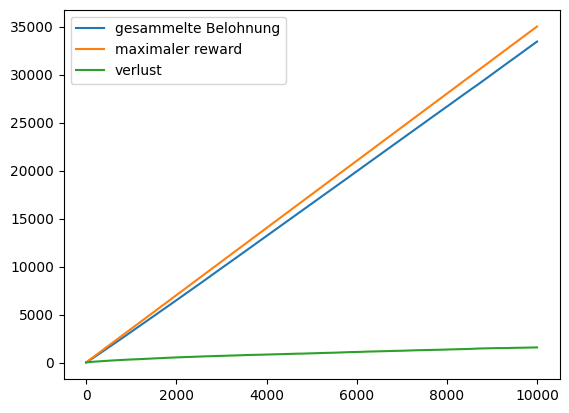

In [15]:
reward_init2, regret_init2, best_perc_init2 = averageraging_plotting(k,num_of_iter,eps,num_of_avg,means,std_dev, init = 2)

# Adaptive Erkundung

In [17]:
k = 4 
num_of_iter = 10000
eps = 0.1
num_of_avg = 100

In [18]:
linear_decay_eps = lambda i, num_of_iterations, eps: eps - (eps/num_of_iterations) * (i-1)
exp_decay_eps = lambda i, num_of_iterations, eps: eps * np.exp(- (i-1))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
The best bandit was selected 80.105 % of the time.


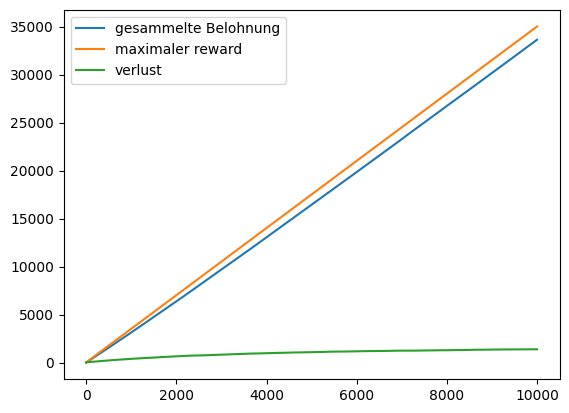

In [19]:
reward_lin, regret_lin, best_perc_lin = averageraging_plotting(k,num_of_iter,eps,num_of_avg,means,std_dev, init = 2, decay= linear_decay_eps )

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
The best bandit was selected 14.041099999999998 % of the time.


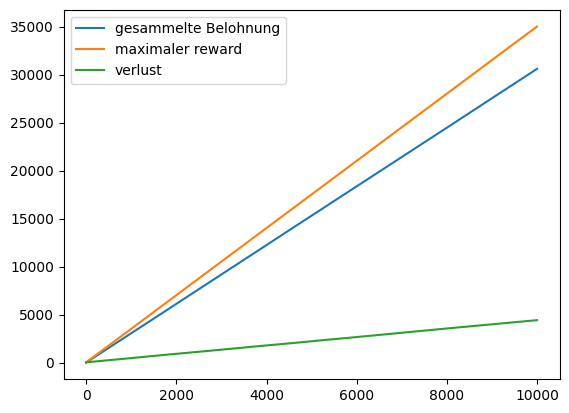

In [20]:
reward_exp, regret_exp, best_perc_exp = averageraging_plotting(k,num_of_iter,eps,num_of_avg,means,std_dev, init = 2, decay= exp_decay_eps )

In [142]:
print(f"Reward bei linearem Decay {reward_lin}")
print(f"Regret bei linearem Decay {regret_lin}")
print(f"% bester Bandit bei linearem Decay {best_perc_lin*100}")
print(f"Reward bei exponentiellem Decay {reward_exp}")
print(f"Regret bei exponentiellem Decay {regret_exp}")
print(f"% bester Bandit bei exponentiellem Decay {best_perc_exp*100}")

Reward bei linearem Decay 33649.77166030251
Regret bei linearem Decay 1360.728339697493
% bester Bandit bei linearem Decay 79.7038
Reward bei exponentiellem Decay 31339.322638806294
Regret bei exponentiellem Decay 3671.177361193699
% bester Bandit bei exponentiellem Decay 27.0229


# Non stationary multi-armed Bandit

In [92]:
def non_stationary_k_armed_bandit(k, num_of_iter, eps, means, std_dev, eps_decay=None):
    means_vec = np.zeros((k,num_of_iter))
    all_values = np.zeros((k, num_of_iter))
    no_of_samples = np.zeros(k)
    total_reward = np.zeros(num_of_iter)
    total_regret = np.zeros(num_of_iter)
    best_mean = np.zeros(num_of_iter)
    selected_bandit = np.zeros(num_of_iter)

    for i in range(k):
        all_values[i][0] = np.random.normal(loc=means[i], scale=std_dev[i])
        no_of_samples[i] += 1
        means_vec[i,0] = all_values[i,0]

    total_reward[0] = np.sum(all_values[0, :], axis=0)
    total_regret[0] = k * np.max(means) - total_reward[0]

    if eps_decay is None: 
        eps_decay = lambda i, num_of_iterations, eps: eps

    for i in range(1, num_of_iter):
        # hier werden die means in jedem schritt verändert
        means += np.random.normal(loc=0, scale=0.05, size=4)
        best_mean[i] = np.max(means)
        means_vec[:, i] = means.T
        eps_yes_no = np.random.uniform(0,1)

        if eps_yes_no <= eps_decay(i, num_of_iter, eps): 
            current_bandit = int(np.floor(np.random.uniform(0,1) * k))
            selected_bandit[i] = current_bandit
            no_of_samples[current_bandit] += 1
            all_values[current_bandit, i] = np.random.normal(loc=means[current_bandit], scale=std_dev[current_bandit])
        else: 
            current_bandit = np.argmax(np.sum(all_values[:, :i], axis=1) / no_of_samples)
            selected_bandit[i] = current_bandit
            no_of_samples[current_bandit] += 1
            all_values[current_bandit, i] = np.random.normal(loc=means[current_bandit], scale=std_dev[current_bandit])
        
        total_reward[i] = total_reward[i-1] + all_values[current_bandit, i]
        total_regret[i] = total_regret[i-1] + (np.max(means) - all_values[current_bandit, i])

    print(no_of_samples)
    return all_values, total_reward, total_regret, means_vec, best_mean, selected_bandit

In [98]:
k = 4 
num_of_iter = 100000
eps = 0.3
means = np.array([4.0, 4.0, 4.0, 4.0])
std_dev = np.array([1, 1, 1, 1])
# hier macht averagen keinen Sinn, da wir die einzelne Auswahl der Banditen tracken wollen und mit der Entwicklung der Banditen Belohnungen vergleichen wollen 
num_of_avg = 1

In [94]:
from scipy import stats
def moving_mode(data, window_size):
    # Berechnung des Modusses (häufigstes Element in dem Window)
    mode_values = []
    for i in range(len(data) - window_size + 1):
        window = data[i:i + window_size]
        mode_value = stats.mode(window)[0][0]  
        mode_values.append(mode_value)
    return np.array(mode_values)


window_size = 10

all_values = np.zeros((k, num_of_iter))
total_reward = np.zeros(num_of_iter)
total_regret = np.zeros(num_of_iter)
best_mean = np.zeros(num_of_iter)
means_vec = np.zeros((k,num_of_iter))
selected_bandit = np.zeros(num_of_iter)

for i in range(num_of_avg):
    means = np.array([4.0, 4.0, 4.0, 4.0])
    all_values_i, total_reward_i, total_regret_i, means_vec_i, best_mean_i, selected_bandit_i = non_stationary_k_armed_bandit(k, num_of_iter,eps,means,std_dev)
    all_values += all_values_i
    total_reward += total_reward_i
    total_regret += total_regret_i
    best_mean += best_mean_i
    means_vec += means_vec_i
    selected_bandit += selected_bandit_i

all_values = all_values/num_of_avg
total_reward = total_reward/num_of_avg
total_regret = total_regret/num_of_avg
best_mean = best_mean/num_of_avg
means_vec = means_vec/num_of_avg
selected_bandit = selected_bandit

[ 7469.  7508. 18327. 66699.]


Performance des $\epsilon$-greedy Algos bei nicht stationären k-ären Banditen

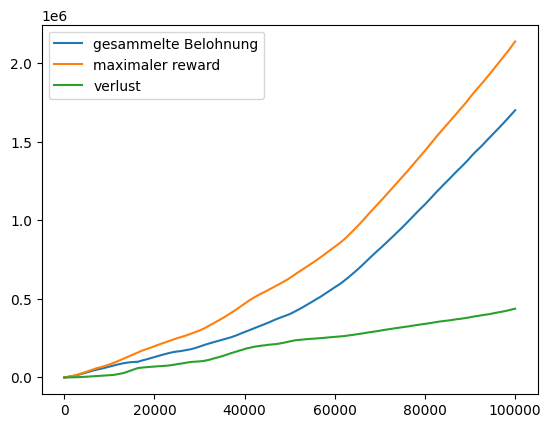

In [102]:
plt.plot(np.linspace(0, num_of_iter-1, num_of_iter), total_reward, label='gesammelte Belohnung')
plt.plot(np.linspace(0, num_of_iter-1, num_of_iter), np.cumsum(best_mean), label='maximaler reward')
plt.plot(np.linspace(0, num_of_iter-1, num_of_iter), total_regret, label='verlust')

plt.legend()
plt.show()

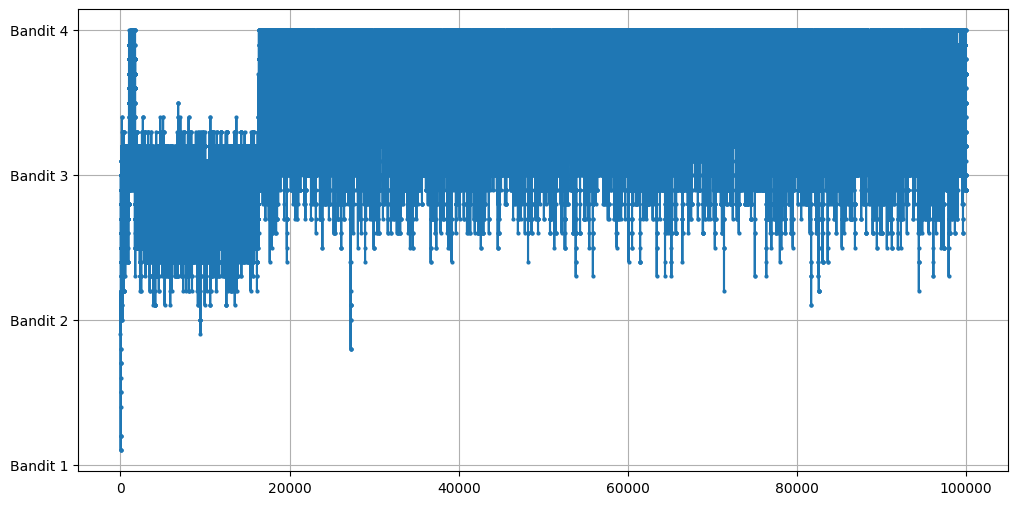

In [96]:

selected_bandit_avg = moving_average(selected_bandit, window_size)

x_values = np.linspace(1, num_of_iter - window_size +1 , num_of_iter - window_size+1)


plt.figure(figsize=(12, 6))
plt.plot(x_values, selected_bandit_avg +1 , 'o-', markersize=2, label='Durchschnitt Bandit-Auswahl')
plt.yticks(np.arange(1, k+1), [f'Bandit {i+1}' for i in range(k)])
plt.grid(True)
plt.show()

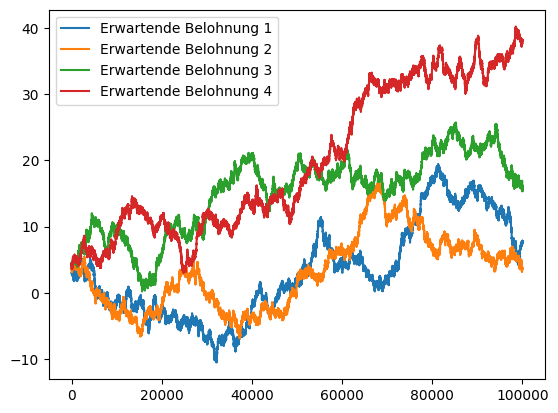

In [97]:
plt.plot(np.linspace(0, num_of_iter-1, num_of_iter), means_vec[0], label='Erwartende Belohnung 1')
plt.plot(np.linspace(0, num_of_iter-1, num_of_iter), means_vec[1], label='Erwartende Belohnung 2')
plt.plot(np.linspace(0, num_of_iter-1, num_of_iter), means_vec[2], label='Erwartende Belohnung 3')
plt.plot(np.linspace(0, num_of_iter-1, num_of_iter), means_vec[3], label='Erwartende Belohnung 4')
plt.legend()
plt.show()